# Práctica 2:  Métodos para funciones de varias variables.

**Misael Vicente Alvarez Camarillo**

**Importamos las librerías necesarias**

In [ ]:
import numpy as np # manipular arrays
import math # operaciones basicas de matemáticas
import pandas as pd # Uso de DataSets
import sympy as sp # operaciones avanzadas de matemáticas
import matplotlib.pyplot as plt # Gráficar
from mpl_toolkits.mplot3d.axes3d import Axes3D # Gráficar

$$a)f(x_{1},x_{2}) = \dfrac{5}{2}x_{1}^{2}+2x_{2}x_{1}-3x_{1}-x_{2}  $$

Donde $$Q=\begin{bmatrix}5 & 2\\2 & 1\end{bmatrix}, b=\begin{bmatrix}3\\1\end{bmatrix} $$

**Resolviendo con el método de maximo descenso**

In [ ]:
# # Definimos nuestra Q y b dadas en nuestra forma cuadratica
Q = np.array([[5,2],[2,1]]) # Q es una matriz
b = np.array([3,1]) # b es un vector

# Esta función tiene como objetivo convertir nuestros xk en un vector
def x_k(x1,x2):
    x = np.array([x1,x2])
    return x 

def g_k_a(x1,x2):
    return np.array([x1,x2])


# Obtenemos nuestro gradiente evaluado en el punto xk ó bien gk = Qx-b
def g_k(x1,x2):
    x = np.array([x1,x2])
    gk = np.dot(Q,x)-b
    return gk

# Obtenemos nuestra alpha_k, donde para mayor eficiencia se divide en partes, la parte superior e inferior de la razon
def a_k(x1,x2,g=g_k):
    sup =  np.dot(np.transpose(g(x1,x2)),g(x1,x2))
    aux = np.dot(np.transpose(g(x1,x2)),Q)
    inf = np.dot(aux,g(x1,x2))
    a =  sup/inf
    return a

# Implementamos el método de máximo descenso con condición de paro gk<tol y un segundo con tope de iteraciones n<10
def MaximoDescenso(tol,w,z, a = a_k, g = g_k, x = x_k, gk = g_k_a):
    n = 0
    xk = np.array([w,z]) # Nuestro vector inicial
    ga = g(xk[0],xk[1])
    ge = np.linalg.norm(gk(ga[0],ga[1])) # error ||gk||
    ### Creamos las listas para guardar los resultados y ponerlos en un dataframe
    x_k = []
    g_a = []
    x_k1 = []
    g_e = []
    e_r = [] # error relativo 
    #####
    # Ponemos una condicional while con dos condicones de paro, la tolerancia y una cantidad maxima de iteraciones
    while (np.linalg.norm(gk(ga[0],ga[1])) >tol and n<100): # np.linalg.norm nos da la norma del vector gk definido anterior
        x_k_1 = x(xk[0],xk[1]) - np.dot(a(xk[0],xk[1]),g(xk[0],xk[1]))
        n += 1
        ####
        x_k.append(xk)
        g_a.append(ga)
        x_k1.append(x_k_1)
        g_e.append(ge)
        e_r.append((np.linalg.norm(x_k_1)-np.linalg.norm(xk))/np.linalg.norm(xk))
        ####
        xk = x_k_1
        ga = g(xk[0],xk[1])
        ge = np.linalg.norm(gk(ga[0],ga[1]))
      # Creamos un diccionario para posteriormente convertirlo en un DataFrame
    data = {
        "xk":x_k,
        "xk1":x_k1,
        "tol":tol,
        "||gk||":g_e,
        "error_relativo":e_r
    }
    df = pd.DataFrame.from_dict(data)
    return df

In [ ]:
# Aproximamos el mínimo pasando por parametro la tolerancia, lo que imprimira seran vectores
# Para x = (1,0)=(w,z)
MaximoDescenso(10e-8,1,0)

,xk,xk1,tol,||gk||,error_relativo
0,"[1, 0]","[0.6551724137931034, -0.1724137931034483]",1.000000e-07,2.236068e+00,-3.225213e-01
1,"[0.6551724137931034, -0.1724137931034483]","[0.9999999999999976, -0.8620689655172299]",1.000000e-07,1.542116e-01,9.488272e-01
2,"[0.9999999999999976, -0.8620689655172299]","[0.9524375743162858, -0.885850178359086]",1.000000e-07,3.084232e-01,-1.482307e-02
3,"[0.9524375743162858, -0.885850178359086]","[1.0000000000000004, -0.9809750297265163]",1.000000e-07,2.127056e-02,7.696306e-02
4,"[1.0000000000000004, -0.9809750297265163]","[0.9934396654229368, -0.9842551970150482]",1.000000e-07,4.254113e-02,-1.691107e-03
5,"[0.9934396654229368, -0.9842551970150482]","[1.0000000000000033, -0.9973758661691898]",1.000000e-07,2.933871e-03,9.941467e-03
6,"[1.0000000000000033, -0.9973758661691898]","[0.9990951262652383, -0.997828303036572]",1.000000e-07,5.867742e-03,-2.271773e-04
7,"[0.9990951262652383, -0.997828303036572]","[1.0000000000000013, -0.9996380505061024]",1.000000e-07,4.046718e-04,1.359217e-03
8,"[1.0000000000000013, -0.9996380505061024]","[0.9998751898296906, -0.9997004555912576]",1.000000e-07,8.093437e-04,-3.122075e-05
9,"[0.9998751898296906, -0.9997004555912576]","[0.9999999999999974, -0.9999500759318647]",1.000000e-07,5.581681e-05,1.872515e-04


In [ ]:
# Aproximamos el mínimo pasando por parametro la tolerancia, lo que imprimira seran vectores
# Para x = (1,1)
MaximoDescenso(10e-8,1,1)

,xk,xk1,tol,||gk||,error_relativo
0,"[1, 1]","[0.31034482758620685, 0.6551724137931034]",1.000000e-07,4.472136e+00,-4.873769e-01
1,"[0.31034482758620685, 0.6551724137931034]","[0.9999999999999987, -0.7241379310344769]",1.000000e-07,3.084232e-01,7.030715e-01
2,"[0.9999999999999987, -0.7241379310344769]","[0.9048751486325781, -0.7717003567181873]",1.000000e-07,6.168463e-01,-3.677466e-02
3,"[0.9048751486325781, -0.7717003567181873]","[1.0000000000000016, -0.9619500594530375]",1.000000e-07,4.254113e-02,1.667578e-01
4,"[1.0000000000000016, -0.9619500594530375]","[0.9868793308458752, -0.9685103940301005]",1.000000e-07,8.508225e-02,-3.487197e-03
5,"[0.9868793308458752, -0.9685103940301005]","[0.9999999999999996, -0.9947517323383481]",1.000000e-07,5.867742e-03,2.008853e-02
6,"[0.9999999999999996, -0.9947517323383481]","[0.9981902525304648, -0.9956566060731156]",1.000000e-07,1.173548e-02,-4.562798e-04
7,"[0.9981902525304648, -0.9956566060731156]","[0.9999999999999988, -0.9992761010121802]",1.000000e-07,8.093437e-04,2.722255e-03
8,"[0.9999999999999988, -0.9992761010121802]","[0.9997503796593723, -0.9994009111824935]",1.000000e-07,1.618687e-03,-6.247795e-05
9,"[0.9997503796593723, -0.9994009111824935]","[0.9999999999999993, -0.9999001518637454]",1.000000e-07,1.116336e-04,3.745754e-04


In [ ]:
# Aproximamos el mínimo pasando por parametro la tolerancia, lo que imprimira seran vectores
# Para x = (-2,2)
MaximoDescenso(10e-8,-2,2)

,xk,xk1,tol,||gk||,error_relativo
0,"[-2, 2]","[-0.4482758620689653, 2.5172413793103448]",1.000000e-07,9.486833e+00,-9.601885e-02
1,"[-0.4482758620689653, 2.5172413793103448]","[0.586206896551714, -0.5862068965517082]",1.000000e-07,6.542643e-01,-6.757638e-01
2,"[0.586206896551714, -0.5862068965517082]","[0.8002378121284117, -0.5148632580261426]",1.000000e-07,1.308529e+00,1.478096e-01
3,"[0.8002378121284117, -0.5148632580261426]","[0.9429250891795462, -0.9429250891795461]",1.000000e-07,9.024336e-02,4.013816e-01
4,"[0.9429250891795462, -0.9429250891795461]","[0.9724465947763327, -0.9330845873139506]",1.000000e-07,1.804867e-01,1.065170e-02
5,"[0.9724465947763327, -0.9330845873139506]","[0.9921275985075239, -0.9921275985075242]",1.000000e-07,1.244736e-02,4.109133e-02
6,"[0.9921275985075239, -0.9921275985075242]","[0.9961995303139771, -0.990770287905373]",1.000000e-07,2.489472e-02,1.371819e-03
7,"[0.9961995303139771, -0.990770287905373]","[0.9989141515182808, -0.9989141515182818]",1.000000e-07,1.716877e-03,5.461093e-03
8,"[0.9989141515182808, -0.9989141515182818]","[0.9994757972846876, -0.9987269362628127]",1.000000e-07,3.433754e-03,1.874890e-04
9,"[0.9994757972846876, -0.9987269362628127]","[0.9998502277956184, -0.9998502277956139]",1.000000e-07,2.368106e-04,7.494643e-04


Podemos observar que al ejecutar el programa en distintos puntos iniciales, el algoritmo de máximo descenso converge y nos da un aproximación como minimo al vector $[1,-1]$

**Ejercicio a) con el método de gradiente conjugado**

In [ ]:
# Definimos nuestra Q y b dadas en nuestra forma cuadratica
Q = np.array([[5,2],[2,1]]) # Q es una matriz
b = np.array([3,1]) # b es un vector

# Estas funciones tiene como objetivo convertir nuestros parametros en un array, sirven como auxliar
def x_k(xn):
    return np.array(xn)

def g_k_a(xn):
    return np.array(xn)

def d_k_a(xn):
    return np.array(xn)

def r_k_a(xn):
    return np.array(xn)

def s_k_a(s):
    return s

def a_k_a(a):
    return a

def g_k_1_a(xn):
    return np.array(xn)

def b_k_a(b):
    return b
############################ hasta aca acaban las funciones auxiliares para guardar los arrays y variables

# Obtenemos nuestro gradiente evaluado en el punto xk ó bien gk = Qx-b
def g_k(xn):
    x = np.array(xn)
    gk = np.dot(Q,x)-b
    return gk

# Obtenemos la rk
def r_k(xn,d=d_k_a):
    x = np.array(xn)
    return np.dot(Q,d(x))
    
# Obtenemos las s_k    
def s_k(xn,yn,d=d_k_a ,r=r_k_a):
    x = np.array(xn)
    y = np.array(yn)
    return np.dot(np.transpose(d([x[0],x[1]])),r([y[0],y[1]]))

# Obtenemos las xk+1
def x_k_1(xn,yn,zn, x=x_k, a=a_k_a, d=d_k_a):
    x1 = np.array(xn)
    z = np.array(zn)
    return x([x1[0],x1[1]]) + np.dot(a(yn),d([z[0],z[1]]))

#Obtenemos las gk+1
def g_k_1(xn,yn,zn,g=g_k_a, a=a_k_a, r=r_k_a):
    x = np.array(xn)
    z = np.array(zn)
    return g([x[0],x[1]]) + np.dot(a(yn),r([z[0],z[1]]))

# Obtenemos las bk
def b_k(xn,yn,zn, g=g_k_1_a, r=r_k_a, s=s_k_a):
    x = np.array(xn)
    y = np.array(yn)
    sup = np.dot(np.transpose(g([x[0],x[1]])),r([y[0],y[1]]))
    inf = s(zn)
    return sup/inf
    
# Obtenemos las dk+1
def d_k_1(xn,yn,zn, g=g_k_1_a, b=b_k_a, d=d_k_a):
    x = np.array(xn)
    z = np.array(zn)
    return -g([x[0],x[1]]) + np.dot(b(yn),d([z[0],z[1]]))


# Para automatizar el gradiente conjugado con alpha usando secante haremos uso de la libreria sympy
# Definimos como variables lo siguiente
x, x1, x2 = sp.symbols('x x1 x2')

# Funcion original del problema
def f(x1,x2,c,d):
    return 5/2*x1**2 + 1/2*x2**2 + 2*x1*x2 - 3*x1 - x2 
    
# Obtenemos el gradiente (No se necesita pero se pone para futuras consultas)
"""
def gradiente(a,b):
    dx = f(x1,x2).diff(x1,1)
    dy = f(x1,x2).diff(x2,1) 
    grad =  sp.Matrix([dx.subs([(x1,a),(x2,b)]),dy.subs([(x1,a),(x2,b)])])
    return grad
"""    

# Para obtener nuestra alpha vamos a usar el metodo de la secante (se usa la variable x para sustituir a ailpha en calculos)

# definimos nuestra dk que ertorna las d en cada iteración
def dk(c,d):
    return sp.Matrix([c,d])

# definimos xm que retorna los xk en cada iteración
def xm(a,b):
    return sp.Matrix([a,b])

# Aca obtenemos las xk que seria obtener los vectores en terminos de alpha ( x en este caso)
def xk(a,b,c,d):
    xn = xm(a,b) + x*dk(c,d)
    return xn

# Aca obtenemos el polinomio en terminos de alpha = x en este caso 
def alph(a,b,c,d):
    xn = xk(a,b,c,d)
    return f(xn[0],xn[1],c,d)

# Primera Derivada respecto a alpha (x para mayor facilidad)
def fa(a,b,c,d):
    fx = alph(a,b,c,d) 
    derivada = fx.diff(x,1)
    return derivada


# Evaluamos la primera derivada que se ocupara en el método de la secante
def primeraDerivada(k,a,b,c,d):
    fx = fa(a,b,c,d)
    dx = fx.subs(x,k)
    l = sp.lambdify(x, dx, "math")  
    return l(k)

# Implementamos nuestra codigo del método de la secante para obtener nuestra alpha
def secante(x0,x1,a,b,c,d,TOL,dx=primeraDerivada):
    """
    Para efectos prácticos
    x0 = x^{k-1}
    x1 = x^{k}
    xk = x^{k+1}
    """
    # Iniciamos el método de Secante 
    k = 0
    xk = (x0*dx(x1,a,b,c,d)- x1*dx(x0,a,b,c,d))/( dx(x1,a,b,c,d)-dx(x0,a,b,c,d))
    # Iniciamos el bucle while como condición de paro el error relativo y un numero maximo de iteraciones k<100
    while (abs((xk-x1)/x1)>=TOL and k<100):
    # Se les modifican los valores para continuar con la iteración y se guardan en las listas los resultados obtenidos
        k +=1 
        x0 = x1
        x1 = xk
        xk = (x0*dx(x1,a,b,c,d)- x1*dx(x0,a,b,c,d))/( dx(x1,a,b,c,d)-dx(x0,a,b,c,d))
    return xk


# Implementamos el método de gradiente conjugado con condición de paro gk<tol y un segundo con tope de iteraciones n<100
def GradienteConjugado(tol,w,z, g=g_k_a,b=b_k,xk1=x_k_1,sk=s_k,rk=r_k,dk1=d_k_1, gk1=g_k_1, gk=g_k):
    n = 0
    ### Creamos las listas para guardar los resultados y ponerlos en un dataframe
    x_k = []
    g_a = []
    x_k1 = []
    g_e = []
    e_r = [] # error relativo 
    #####
    xk = np.array([w,z]) # vector de inicio
    i = gk([xk[0],xk[1]]) # inicialización, valores de gk
    j = -i # Se obtiene d0 = -gk
    while (np.linalg.norm(g([i[0],i[1]]))>tol and n<100):
        d = dk(j[0],j[1]) # guarda la dirección d en un vector tipo sympy para obtener alpha
        rk1 = rk([j[0],j[1]]) # se implementa rk
        sk1 = sk([j[0],j[1]],[rk1[0],rk1[1]]) # se implementa sk
        # Ocupamos el metodo de la secante para obtener alpha
        ak1 = secante(0,1,xk[0],xk[1],d[0],d[1],1e-5)
        xk_1 = xk1([xk[0],xk[1]],ak1,[j[0],j[1]]) # Obtenemos los xk+1
        gk_1 = gk1([i[0],i[1]],ak1,[rk1[0],rk1[1]]) # obtenemos los gk+1
        i = gk_1 # hacemos un cambio de variable para que siga la ietración
        ge =  np.linalg.norm(g([i[0],i[1]]))
        ######
        x_k.append(xk)
        g_a.append(i)
        x_k1.append(xk_1)
        g_e.append(ge)
        e_r.append((np.linalg.norm(xk_1)-np.linalg.norm(xk))/np.linalg.norm(xk)) # error relativo 
        #######
        bk = b([i[0],i[1]],[rk1[0],rk1[1]],sk1) # obtenemos bk
        dk_1 = dk1([i[0],i[1]],bk,[j[0],j[1]]) # obtenemos dk+1
        # cambio de variable
        j = dk_1
        xk = xk_1
        n+=1
        # Creamos un diccionario para posteriormente convertirlo en un DataFrame
    data = {
        "xk":x_k,
        "xk1":x_k1,
        "tol":tol,
        "||gk||":g_e,
        "error_relativo":e_r
    }
    df = pd.DataFrame.from_dict(data)
    return df

In [ ]:
# Aproximamos el mínimo pasando por parametro la tolerancia, lo que imprimira seran vectores
# Para x = (1,0)
GradienteConjugado(10e-8,1,0)

,xk,xk1,tol,||gk||,error_relativo
0,"[1, 0]","[0.6551724137931034, -0.1724137931034483]",1.000000e-07,1.542116e-01,-0.322521
1,"[0.6551724137931034, -0.1724137931034483]","[1.0000000000000004, -1.0000000000000013]",1.000000e-07,2.830524e-16,1.087466


In [ ]:
# Aproximamos el mínimo pasando por parametro la tolerancia, lo que imprimira seran vectores
# Para x = (1,1)
GradienteConjugado(10e-8,1,1)

,xk,xk1,tol,||gk||,error_relativo
0,"[1, 1]","[0.31034482758620685, 0.6551724137931034]",1.000000e-07,3.084232e-01,-0.487377
1,"[0.31034482758620685, 0.6551724137931034]","[0.9999999999999989, -0.9999999999999973]",1.000000e-07,4.126163e-16,0.950751


In [ ]:
# Aproximamos el mínimo pasando por parametro la tolerancia, lo que imprimira seran vectores
# Para x = (-2,2)
GradienteConjugado(10e-8,-2,2)

,xk,xk1,tol,||gk||,error_relativo
0,"[-2, 2]","[-0.4482758620689653, 2.5172413793103448]",1.000000e-07,6.542643e-01,-0.096019
1,"[-0.4482758620689653, 2.5172413793103448]","[1.0000000000000009, -1.0000000000000022]",1.000000e-07,4.236705e-16,-0.446891


Podemos observar que al tener diferentes puntos iniciales con el método de gradiente conjugado igual se llega al minimo $[1,-1]$ con la diferencia que converge en dos ietraciones 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  if sys.path[0] == '':


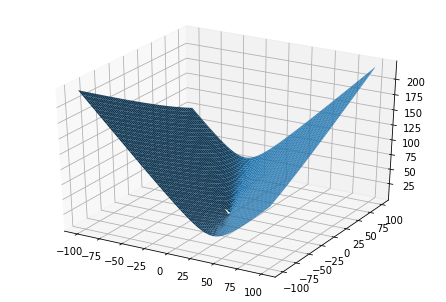

In [ ]:
fig = plt.figure()
 
axes3d = Axes3D(fig)
 
x1 = np.linspace(-100,100,100)
x2 = np.linspace(-100,100,100)
 
X1,X2 = np.meshgrid(x1,x2)
Z = np.sqrt((5/2)*X1**2 + (1/2)*X2**2 + 2*X1*X2 - 3*X1 - X2 )
 

axes3d.plot_surface(X1,X2,Z)

$$b)f(x_{1},x_{2},x_{3}) = x_{1}^{2}-x_{1}+x_{2}^{2}+x_{2}+3x_{3}+x_{1}x_{2}+x_{2}x_{3}+x_{3}^2  $$

Donde $$Q=\begin{bmatrix}2 & 1 & 0\\1 & 2 & 1\\0 & 1 & 2 \end{bmatrix}, b=\begin{bmatrix}1\\-1\\-3 \end{bmatrix} $$

**Resolviendo con el método de maximo descenso**

In [ ]:
# Definimos nuestra Q y b dadas en nuestra forma cuadratica
Q = np.array([[2,1,0],[1,2,1],[0,1,2]]) # Q es una matriz
b = np.array([1,-1,-3]) # b es un vector

# Esta función tiene como objetivo convertir nuestros xk en un vector
def x_k(x1,x2,x3):
    x = np.array([x1,x2,x3])
    return x 

def g_k_a(x1,x2,x3):
    return np.array([x1,x2,x3])


# Obtenemos nuestro gradiente evaluado en el punto xk ó bien gk = Qx-b
def g_k(x1,x2,x3):
    x = np.array([x1,x2,x3])
    gk = np.dot(Q,x)-b
    return gk

# Obtenemos nuestra alpha_k, donde para mayor eficiencia se divide en partes, la parte superior e inferior de la razon
def a_k(x1,x2,x3,g=g_k):
    sup =  np.dot(np.transpose(g(x1,x2,x3)),g(x1,x2,x3))
    aux = np.dot(np.transpose(g(x1,x2,x3)),Q)
    inf = np.dot(aux,g(x1,x2,x3))
    a =  sup/inf
    return a

# Implementamos el método de máximo descenso con condición de paro gk<tol y un segundo con tope de iteraciones n<10
def MaximoDescenso(tol,w,y,z, a = a_k, g = g_k, x = x_k, gk = g_k_a):
    n = 0
    xk = np.array([w,y,z]) # Nuestro vector inicial
    ga = g(xk[0],xk[1],xk[2])
    ge = np.linalg.norm(gk(ga[0],ga[1],ga[2])) # error ||gk||
    ### Creamos las listas para guardar los resultados y ponerlos en un dataframe
    x_k = []
    g_a = []
    x_k1 = []
    g_e = []
    e_r = [] # error relativo 
    #####
    while (np.linalg.norm(gk(ga[0],ga[1],ga[2]))>tol and n<100): # np.linalg.norm nos da la norma del vector gk definido anterior
        x_k_1 = x(xk[0],xk[1],xk[2]) - np.dot(a(xk[0],xk[1],xk[2]),g(xk[0],xk[1],xk[2]))
        n += 1
        ####
        x_k.append(xk)
        g_a.append(ga)
        x_k1.append(x_k_1)
        g_e.append(ge)
        e_r.append((np.linalg.norm(x_k_1)-np.linalg.norm(xk))/np.linalg.norm(xk))
        ####
        xk = x_k_1
        ga = g(xk[0],xk[1],xk[2])
        ge = np.linalg.norm(gk(ga[0],ga[1],ga[2]))
      # Creamos un diccionario para posteriormente convertirlo en un DataFrame
    data = {
        "xk":x_k,
        "xk1":x_k1,
        "tol":tol,
        "||gk||":g_e,
        "error_relativo":e_r
    }
    df = pd.DataFrame.from_dict(data)
    return df

In [ ]:
# Aproximamos el mínimo pasando por parametro la tolerancia, lo que imprimira seran vectores
# Para x = (1,0,0)=(w,y,z)
MaximoDescenso(10e-8,1,0,0)

,xk,xk1,tol,||gk||,error_relativo
0,"[1, 0, 0]","[0.6818181818181819, -0.6363636363636364, -0.9...",1.000000e-07,3.741657e+00,3.345380e-01
1,"[0.6818181818181819, -0.6363636363636364, -0.9...","[0.8463949843260188, -0.30721003134796243, -1....",1.000000e-07,7.606000e-01,1.415341e-01
2,"[0.8463949843260188, -0.30721003134796243, -1....","[0.6554268270514976, -0.30876261799247057, -1....",1.000000e-07,4.516174e-01,2.989642e-03
3,"[0.6554268270514976, -0.30876261799247057, -1....","[0.6543718360879048, -0.15367883311953187, -1....",1.000000e-07,3.073904e-01,-1.558169e-02
4,"[0.6543718360879048, -0.15367883311953187, -1....","[0.5775293880403285, -0.15436886108070377, -1....",1.000000e-07,2.193083e-01,2.580495e-02
5,"[0.5775293880403285, -0.15436886108070377, -1....","[0.5771813050893185, -0.07683322102376847, -1....",1.000000e-07,1.536820e-01,-3.647831e-03
6,"[0.5771813050893185, -0.07683322102376847, -1....","[0.5387615827677248, -0.07717820718479836, -1....",1.000000e-07,1.096453e-01,1.428029e-02
7,"[0.5387615827677248, -0.07717820718479836, -1....","[0.5385875408630288, -0.03841351299306196, -1....",1.000000e-07,7.683480e-02,-8.557689e-04
8,"[0.5385875408630288, -0.03841351299306196, -1....","[0.5193792287157953, -0.03858599216551592, -1....",1.000000e-07,5.481824e-02,7.429931e-03
9,"[0.5193792287157953, -0.03858599216551592, -1....","[0.5192922147810843, -0.019205207861995734, -1...",1.000000e-07,3.841430e-02,-1.933915e-04


In [ ]:
# Aproximamos el mínimo pasando por parametro la tolerancia, lo que imprimira seran vectores
# Para x = (2,3,5)=(w,y,z)
MaximoDescenso(10e-8,2,3,5)

,xk,xk1,tol,||gk||,error_relativo
0,"[2, 3, 5]","[0.16080402010050254, -1.291457286432161, 0.09...",1.000000e-07,2.209072e+01,-7.883128e-01
1,"[0.16080402010050254, -1.291457286432161, 0.09...","[1.135888449111536, -0.6347677730165667, -0.84...",1.000000e-07,3.041110e+00,1.888754e-01
2,"[1.135888449111536, -0.6347677730165667, -0.84...","[0.8275045641922105, -0.6452102206351131, -1.1...",1.000000e-07,9.288551e-01,1.393287e-02
3,"[0.8275045641922105, -0.6452102206351131, -1.1...","[0.8224390111898002, -0.31705135257820505, -1....",1.000000e-07,6.349685e-01,-6.489755e-02
4,"[0.8224390111898002, -0.31705135257820505, -1....","[0.663729732644942, -0.3222578788893752, -1.33...",1.000000e-07,4.637122e-01,3.773748e-02
5,"[0.663729732644942, -0.3222578788893752, -1.33...","[0.6610407686702056, -0.1583550499399052, -1.3...",1.000000e-07,3.171423e-01,-1.625749e-02
6,"[0.6610407686702056, -0.1583550499399052, -1.3...","[0.5817765870430625, -0.1609555110971374, -1.4...",1.000000e-07,2.316065e-01,2.645121e-02
7,"[0.5817765870430625, -0.1609555110971374, -1.4...","[0.5804337232207469, -0.07909230361017838, -1....",1.000000e-07,1.584005e-01,-3.668978e-03
8,"[0.5804337232207469, -0.07909230361017838, -1....","[0.540844284291961, -0.08039113470809611, -1.4...",1.000000e-07,1.156786e-01,1.468724e-02
9,"[0.540844284291961, -0.08039113470809611, -1.4...","[0.5401735748808174, -0.03950358698847057, -1....",1.000000e-07,7.911498e-02,-7.559064e-04


In [ ]:
# Aproximamos el mínimo pasando por parametro la tolerancia, lo que imprimira seran vectores
# Para x = (3,2,1)=(w,y,z)
MaximoDescenso(10e-8,3,2,1)

,xk,xk1,tol,||gk||,error_relativo
0,"[3, 2, 1]","[0.9459016393442621, -0.6409836065573771, -1.0...",1.000000e-07,1.337909e+01,-5.845215e-01
1,"[0.9459016393442621, -0.6409836065573771, -1.0...","[0.5223476647077028, 0.01787813176616171, -1.4...",1.000000e-07,5.273034e-01,8.223248e-03
2,"[0.5223476647077028, 0.01787813176616171, -1.4...","[0.5039859441314725, -0.005729794688991548, -1...",1.000000e-07,1.195966e-01,7.193303e-03
3,"[0.5039859441314725, -0.005729794688991548, -1...","[0.500199767247155, 0.00015981379772410896, -1...",1.000000e-07,4.713600e-03,1.505202e-03
4,"[0.500199767247155, 0.00015981379772410896, -1...","[0.5000356306171975, -5.121901222132627e-05, -...",1.000000e-07,1.069081e-03,6.564295e-05
5,"[0.5000356306171975, -5.121901222132627e-05, -...","[0.5000017857325834, 1.4285860667978214e-06, -...",1.000000e-07,4.213518e-05,1.353722e-05
6,"[0.5000017857325834, 1.4285860667978214e-06, -...","[0.5000003185044345, -4.578501245265231e-07, -...",1.000000e-07,9.556589e-06,5.868903e-07
7,"[0.5000003185044345, -4.578501245265231e-07, -...","[0.500000015962781, 1.2770225039556383e-08, -1...",1.000000e-07,3.766492e-07,1.210166e-07


Podemos ver que convergen en diferentes iteraciones dependiendo sea el punto inicial, y observamos que los tres diferentes puntos iniciales con el método de máximo descenso se aproximan al minimo $[0.5,0,-1.5]$

**Ejercicio b) con el método de gradiente conjugado**

In [ ]:
# Definimos nuestra Q y b dadas en nuestra forma cuadratica
Q = np.array([[2,1,0],[1,2,1],[0,1,2]]) # Q es una matriz
b = np.array([1,-1,-3]) # b es un vector

# Estas funciones tiene como objetivo convertir nuestros parametros en un array, sirven como auxliar
def x_k(xn):
    return np.array(xn)

def g_k_a(xn):
    return np.array(xn)

def d_k_a(xn):
    return np.array(xn)

def r_k_a(xn):
    return np.array(xn)

def s_k_a(s):
    return s

def a_k_a(a):
    return a

def g_k_1_a(xn):
    return np.array(xn)

def b_k_a(b):
    return b
############################ hasta aca acaban las funciones auxiliares para guardar los arrays y variables

# Obtenemos nuestro gradiente evaluado en el punto xk ó bien gk = Qx-b
def g_k(xn):
    x = np.array(xn)
    gk = np.dot(Q,x)-b
    return gk

# Obtenemos la rk
def r_k(xn,d=d_k_a):
    x = np.array(xn)
    return np.dot(Q,d(x))
    
# Obtenemos las s_k    
def s_k(xn,yn,d=d_k_a ,r=r_k_a):
    x = np.array(xn)
    y = np.array(yn)
    return np.dot(np.transpose(d([x[0],x[1],x[2]])),r([y[0],y[1],y[2]]))

# Obtenemos las xk+1
def x_k_1(xn,yn,zn, x=x_k, a=a_k_a, d=d_k_a):
    x1 = np.array(xn)
    z = np.array(zn)
    return x([x1[0],x1[1],x1[2]]) + np.dot(a(yn),d([z[0],z[1],z[2]]))

#Obtenemos las gk+1
def g_k_1(xn,yn,zn,g=g_k_a, a=a_k_a, r=r_k_a):
    x = np.array(xn)
    z = np.array(zn)
    return g([x[0],x[1],x[2]]) + np.dot(a(yn),r([z[0],z[1],z[2]]))

# Obtenemos las bk
def b_k(xn,yn,zn, g=g_k_1_a, r=r_k_a, s=s_k_a):
    x = np.array(xn)
    y = np.array(yn)
    sup = np.dot(np.transpose(g([x[0],x[1],x[2]])),r([y[0],y[1],y[2]]))
    inf = s(zn)
    return sup/inf
    
# Obtenemos las dk+1
def d_k_1(xn,yn,zn, g=g_k_1_a, b=b_k_a, d=d_k_a):
    x = np.array(xn)
    z = np.array(zn)
    return -g([x[0],x[1],x[2]]) + np.dot(b(yn),d([z[0],z[1],z[2]]))


# Para automatizar el gradiente conjugado con alpha usando secante haremos uso de la libreria sympy
# Definimos como variables lo siguiente
x, x1, x2, x3 = sp.symbols('x x1 x2 x3')

# Funcion original del problema
def f(x1,x2,x3,d,e,f):
    return x1**2 - x1 + x2**2 + x2 + 3*x3 + x1*x2 + x2*x3 + x3**2 

    
# Obtenemos el gradiente (No se necesita pero se pone para futuras consultas)
"""
def gradiente(a,b,c):
    dx = f(x1,x2,x3).diff(x1,1)
    dy = f(x1,x2,x3).diff(x2,1)
    dz = f(x1,x2,x3).diff(x3,1)
    grad =  sp.Matrix([dx.subs([(x1,a),(x2,b),(x3,c)]),dy.subs([(x1,a),(x2,b),(x3,c)]),dz.subs([(x1,a),(x2,b),(x3,c)])])
    return grad
"""    

# Para obtener nuestra alpha vamos a usar el metodo de la secante (se usa la variable x para sustituir a ailpha en calculos)

# definimos nuestra dk que retorna las d en cada iteración
def dk(b1,b2,b3):
    return sp.Matrix([b1,b2,b3])

# definimos xm que retorna los xk en cada iteración
def xm(a1,a2,a3):
    return sp.Matrix([a1,a2,a3])

# Aca obtenemos las xk que seria obtener los vectores en terminos de alpha ( x en este caso)
def xk(a1,a2,a3,b1,b2,b3):
    xn = xm(a1,a2,a3) + x*dk(b1,b2,b3)
    return xn

# Aca obtenemos el polinomio en terminos de alpha = x en este caso 
def alph(a1,a2,a3,b1,b2,b3):
    xn = xk(a1,a2,a3,b1,b2,b3)
    return f(xn[0],xn[1],xn[2],b1,b2,b3)

# Primera Derivada respecto a alpha (x para mayor facilidad)
def fa(a1,a2,a3,b1,b2,b3):
    fx = alph(a1,a2,a3,b1,b2,b3) 
    derivada = fx.diff(x,1)
    return derivada


# Evaluamos la primera derivada que se ocupara en el método de la secante
def primeraDerivada(k,a1,a2,a3,b1,b2,b3):
    fx = fa(a1,a2,a3,b1,b2,b3)
    dx = fx.subs(x,k)
    l = sp.lambdify(x, dx, "math")  
    return l(k)

# Implementamos nuestra codigo del método de la secante para obtener nuestra alpha
def secante(x0,x1,a1,a2,a3,b1,b2,b3,TOL,dx=primeraDerivada):
    """
    Para efectos prácticos
    x0 = x^{k-1}
    x1 = x^{k}
    xk = x^{k+1}
    """
    # Iniciamos el método de Secante con su formula
    k = 0
    xk = (x0*dx(x1,a1,a2,a3,b1,b2,b3)- x1*dx(x0,a1,a2,a3,b1,b2,b3))/( dx(x1,a1,a2,a3,b1,b2,b3)-dx(x0,a1,a2,a3,b1,b2,b3))
    # Iniciamos el bucle while como condición de paro el error relativo y un numero maximo de iteraciones k<100
    while (abs((xk-x1)/x1)>=TOL and k<100):
    # Se les modifican los valores para continuar con la iteración y se guardan en las listas los resultados obtenidos
        k +=1 
        x0 = x1
        x1 = xk
        xk = (x0*dx(x1,a1,a2,a3,b1,b2,b3)- x1*dx(x0,a1,a2,a3,b1,b2,b3))/( dx(x1,a1,a2,a3,b1,b2,b3)-dx(x0,a1,a2,a3,b1,b2,b3))
    return xk


# Implementamos nuestra función de gradiente conjugado con condición de paro gk<tol y un segundo con tope de iteraciones n<100
def GradienteConjugado(tol,w,y,z, g=g_k_a,b=b_k,xk1=x_k_1,sk=s_k,rk=r_k,dk1=d_k_1, gk1=g_k_1, gk=g_k):
    n = 0
    ### Creamos las listas para guardar los resultados y ponerlos en un dataframe
    x_k = []
    g_a = []
    x_k1 = []
    g_e = []
    e_r = [] # error relativo 
    #####
    xk = np.array([w,y,z]) # vector de inicio
    i = gk([xk[0],xk[1],xk[2]]) # inicialización, valores de gk
    j = -i # Se obtiene d0 = -gk
    while (np.linalg.norm(g([i[0],i[1],i[2]]))>tol and n<100):
        d = dk(j[0],j[1],j[2]) # guarda la dirección d en un vector tipo sympy para obtener alpha
        rk1 = rk([j[0],j[1],j[2]]) # se implementa rk
        sk1 = sk([j[0],j[1],j[2]],[rk1[0],rk1[1],rk1[2]]) # se implementa sk
        # Ocupamos el metodo de la secante para obtener alpha
        ak1 = secante(0,1,xk[0],xk[1],xk[2],d[0],d[1],d[2],1e-5)
        xk_1 = xk1([xk[0],xk[1],xk[2]],ak1,[j[0],j[1],j[2]]) # Obtenemos los xk+1
        gk_1 = gk1([i[0],i[1],i[2]],ak1,[rk1[0],rk1[1],rk1[2]]) # obtenemos los gk+1
        i = gk_1 # hacemos un cambio de variable para que siga la ietración
        ge =  np.linalg.norm(g([i[0],i[1],i[2]]))
        ######
        x_k.append(xk)
        g_a.append(i)
        x_k1.append(xk_1)
        g_e.append(ge)
        e_r.append((np.linalg.norm(xk_1)-np.linalg.norm(xk))/np.linalg.norm(xk)) # error relativo 
        #######
        bk = b([i[0],i[1],i[2]],[rk1[0],rk1[1],rk1[2]],sk1) # obtenemos bk
        dk_1 = dk1([i[0],i[1],i[2]],bk,[j[0],j[1],j[2]]) # obtenemos dk+1
        # cambio de variable
        j = dk_1
        xk = xk_1 
        n+=1
            # Creamos un diccionario para posteriormente convertirlo en un DataFrame
    data = {
        "xk":x_k,
        "xk1":x_k1,
        "tol":tol,
        "||gk||":g_e,
        "error_relativo":e_r
    }
    df = pd.DataFrame.from_dict(data)
    return df

In [ ]:
# Aproximamos el mínimo pasando por parametro la tolerancia, lo que imprimira seran vectores
# Para x = (1,0,0)
GradienteConjugado(10e-8,1,0,0)

,xk,xk1,tol,||gk||,error_relativo
0,"[1, 0, 0]","[0.6818181818181819, -0.6363636363636364, -0.9...",1.000000e-07,7.606000e-01,0.334538
1,"[0.6818181818181819, -0.6363636363636364, -0.9...","[0.8333333333333334, -0.3333333333333333, -1.3...",1.000000e-07,3.726780e-01,0.204368
2,"[0.8333333333333334, -0.3333333333333333, -1.3...","[0.49999999999999967, 2.7755575615628914e-16, ...",1.000000e-07,5.325600e-16,-0.016261


In [ ]:
# Aproximamos el mínimo pasando por parametro la tolerancia, lo que imprimira seran vectores
# Para x = (2,3,5)
GradienteConjugado(10e-8,2,3,5)

,xk,xk1,tol,||gk||,error_relativo
0,"[2, 3, 5]","[0.16080402010050254, -1.291457286432161, 0.09...",1.000000e-07,3.041110e+00,-0.788313
1,"[0.16080402010050254, -1.291457286432161, 0.09...","[1.108608373742114, -0.7495177016528496, -1.02...",1.000000e-07,6.570633e-01,0.293765
2,"[1.108608373742114, -0.7495177016528496, -1.02...","[0.499999999999999, 4.440892098500626e-16, -1....",1.000000e-07,2.668724e-15,-0.063456


In [ ]:
# Aproximamos el mínimo pasando por parametro la tolerancia, lo que imprimira seran vectores
# Para x = (3,2,1)
GradienteConjugado(10e-8,3,2,1)

,xk,xk1,tol,||gk||,error_relativo
0,"[3, 2, 1]","[0.9459016393442621, -0.6409836065573771, -1.0...",1.000000e-07,5.273034e-01,-0.584522
1,"[0.9459016393442621, -0.6409836065573771, -1.0...","[0.4999999999999996, 2.220446049250313e-16, -1...",1.000000e-07,8.759512e-16,0.017085


Podemos ver que convergen en las mismas iteraciones independiente de cual sea el punto inicial, ya que estamos en $R^{3}$ vemos que converge en 3 iteraciones, y observamos que los tres diferentes puntos iniciales con el método de gradiente conjugado se aproximan al minimo $[0.5,0,-1.5]$

3.- Sea $f(x_{1},x_{2}) = -x_{1}^{2}-x_{1}x_{2}-3x_{1}+x_{2}^{2} $, resolver con los programas anteriores con una tolerancia de $10^{-5}$ y punto inicial $\bar{x}^{0} = \bar{0}$

Donde $$Q=\begin{bmatrix}-2 & -1\\-1 & 2\end{bmatrix}, b=\begin{bmatrix}3\\0\end{bmatrix} $$

In [ ]:
# # Definimos nuestra Q y b dadas en nuestra forma cuadratica
Q = np.array([[-2,-1],[-1,2]]) # Q es una matriz
b = np.array([3,0]) # b es un vector

# Esta función tiene como objetivo convertir nuestros xk en un vector
def x_k(x1,x2):
    x = np.array([x1,x2])
    return x 

def g_k_a(x1,x2):
    return np.array([x1,x2])


# Obtenemos nuestro gradiente evaluado en el punto xk ó bien gk = Qx-b
def g_k(x1,x2):
    x = np.array([x1,x2])
    gk = np.dot(Q,x)-b
    return gk

# Obtenemos nuestra alpha_k, donde para mayor eficiencia se divide en partes, la parte superior e inferior de la razon
def a_k(x1,x2,g=g_k):
    sup =  np.dot(np.transpose(g(x1,x2)),g(x1,x2))
    aux = np.dot(np.transpose(g(x1,x2)),Q)
    inf = np.dot(aux,g(x1,x2))
    a =  sup/inf
    return a

# Implementamos el método de máximo descenso con condición de paro gk<tol y un segundo con tope de iteraciones n<10
def MaximoDescenso(tol,w,z, a = a_k, g = g_k, x = x_k, gk = g_k_a):
    n = 0
    xk = np.array([w,z])
    ###
    x_k = []
    x_k1 = []
    g_e = []
    ###
    ga = g(xk[0],xk[1])
    ge = np.linalg.norm(gk(ga[0],ga[1]))
    while (np.linalg.norm(gk(ga[0],ga[1]))>tol and n<100): # np.linalg.norm nos da la norma del vector gk definido anterior
        x_k_1 = x(xk[0],xk[1]) - np.dot(a(xk[0],xk[1]),g(xk[0],xk[1]))
        n += 1
        ##
        x_k.append(xk)
        x_k1.append(x_k_1)
        ##
        xk = x_k_1
        ga = g(xk[0],xk[1])
        ge = np.linalg.norm(gk(ga[0],ga[1]))
        ##
        g_e.append(ge)
        ##
     # Creamos un diccionario para posteriormente convertirlo en un DataFrame
    data = {
        "xk":x_k,
        "xk1":x_k1,
        "||gk||":g_e
    }
    df = pd.DataFrame.from_dict(data)
    return df

In [ ]:
# Aproximamos el mínimo pasando por parametro la tolerancia, lo que imprimira seran vectores
MaximoDescenso(10e-5,0,0)

,xk,xk1,||gk||
0,"[0, 0]","[-1.5, 0.0]",1.500000
1,"[-1.5, 0.0]","[-1.5, -0.75]",0.750000
2,"[-1.5, -0.75]","[-1.125, -0.75]",0.375000
3,"[-1.125, -0.75]","[-1.125, -0.5625]",0.187500
4,"[-1.125, -0.5625]","[-1.21875, -0.5625]",0.093750
5,"[-1.21875, -0.5625]","[-1.21875, -0.609375]",0.046875
6,"[-1.21875, -0.609375]","[-1.1953125, -0.609375]",0.023438
7,"[-1.1953125, -0.609375]","[-1.1953125, -0.59765625]",0.011719
8,"[-1.1953125, -0.59765625]","[-1.201171875, -0.59765625]",0.005859
9,"[-1.201171875, -0.59765625]","[-1.201171875, -0.6005859375]",0.002930


Podemos observar que el método de máximo descenso converge y aproxima al minimo el cual es $[-1.2,-0.6]$

**Pregunta 3 con el método de gradiente conjugado con secante**

In [ ]:
# Definimos nuestra Q y b dadas en nuestra forma cuadratica
Q = np.array([[-2,-1],[-1,2]]) # Q es una matriz
b = np.array([3,0]) # b es un vector

# Estas funciones tiene como objetivo convertir nuestros parametros en un array, sirven como auxliar
def x_k(xn):
    return np.array(xn)

def g_k_a(xn):
    return np.array(xn)

def d_k_a(xn):
    return np.array(xn)

def r_k_a(xn):
    return np.array(xn)

def s_k_a(s):
    return s

def a_k_a(a):
    return a

def g_k_1_a(xn):
    return np.array(xn)

def b_k_a(b):
    return b
############################ hasta aca acaban las funciones auxiliares para guardar los arrays y variables

# Obtenemos nuestro gradiente evaluado en el punto xk ó bien gk = Qx-b
def g_k(xn):
    x = np.array(xn)
    gk = np.dot(Q,x)-b
    return gk

# Obtenemos la rk
def r_k(xn,d=d_k_a):
    x = np.array(xn)
    return np.dot(Q,d(x))
    
# Obtenemos las s_k    
def s_k(xn,yn,d=d_k_a ,r=r_k_a):
    x = np.array(xn)
    y = np.array(yn)
    return np.dot(np.transpose(d([x[0],x[1]])),r([y[0],y[1]]))

# Obtenemos las xk+1
def x_k_1(xn,yn,zn, x=x_k, a=a_k_a, d=d_k_a):
    x1 = np.array(xn)
    z = np.array(zn)
    return x([x1[0],x1[1]]) + np.dot(a(yn),d([z[0],z[1]]))

#Obtenemos las gk+1
def g_k_1(xn,yn,zn,g=g_k_a, a=a_k_a, r=r_k_a):
    x = np.array(xn)
    z = np.array(zn)
    return g([x[0],x[1]]) + np.dot(a(yn),r([z[0],z[1]]))

# Obtenemos las bk
def b_k(xn,yn,zn, g=g_k_1_a, r=r_k_a, s=s_k_a):
    x = np.array(xn)
    y = np.array(yn)
    sup = np.dot(np.transpose(g([x[0],x[1]])),r([y[0],y[1]]))
    inf = s(zn)
    return sup/inf
    
# Obtenemos las dk+1
def d_k_1(xn,yn,zn, g=g_k_1_a, b=b_k_a, d=d_k_a):
    x = np.array(xn)
    z = np.array(zn)
    return -g([x[0],x[1]]) + np.dot(b(yn),d([z[0],z[1]]))


# Para automatizar el gradiente conjugado con alpha usando secante haremos uso de la libreria sympy
# Definimos como variables lo siguiente
x, x1, x2 = sp.symbols('x x1 x2')

# Funcion original del problema
def f(x1,x2,c,d):
    return -x1**2 - x1*x2 - 3*x1 + x2**2
    
# Obtenemos el gradiente (No se necesita pero se pone para futuras consultas)
"""
def gradiente(a,b):
    dx = f(x1,x2).diff(x1,1)
    dy = f(x1,x2).diff(x2,1) 
    grad =  sp.Matrix([dx.subs([(x1,a),(x2,b)]),dy.subs([(x1,a),(x2,b)])])
    return grad
"""    

# Para obtener nuestra alpha vamos a usar el metodo de la secante (se usa la variable x para sustituir a ailpha en calculos)

# definimos nuestra dk que ertorna las d en cada iteración
def dk(c,d):
    return sp.Matrix([c,d])

# definimos xm que retorna los xk en cada iteración
def xm(a,b):
    return sp.Matrix([a,b])

# Aca obtenemos las xk que seria obtener los vectores en terminos de alpha ( x en este caso)
def xk(a,b,c,d):
    xn = xm(a,b) + x*dk(c,d)
    return xn

# Aca obtenemos el polinomio en terminos de alpha = x en este caso 
def alph(a,b,c,d):
    xn = xk(a,b,c,d)
    return f(xn[0],xn[1],c,d)

# Primera Derivada respecto a alpha (x para mayor facilidad)
def fa(a,b,c,d):
    fx = alph(a,b,c,d) 
    derivada = fx.diff(x,1)
    return derivada


# Evaluamos la primera derivada que se ocupara en el método de la secante
def primeraDerivada(k,a,b,c,d):
    fx = fa(a,b,c,d)
    dx = fx.subs(x,k)
    l = sp.lambdify(x, dx, "math")  
    return l(k)

# Implementamos nuestra codigo del método de la secante para obtener nuestra alpha
def secante(x0,x1,a,b,c,d,TOL,dx=primeraDerivada):
    """
    Para efectos prácticos
    x0 = x^{k-1}
    x1 = x^{k}
    xk = x^{k+1}
    """
    # Iniciamos el método de Secante con su formula
    k = 0
    xk = (x0*dx(x1,a,b,c,d)- x1*dx(x0,a,b,c,d))/( dx(x1,a,b,c,d)-dx(x0,a,b,c,d))
    # Iniciamos el bucle while como condición de paro el error relativo y un numero maximo de iteraciones k<100
    while (abs((xk-x1)/x1)>=TOL and k<100):
    # Se les modifican los valores para continuar con la iteración y se guardan en las listas los resultados obtenidos
        k +=1 
        x0 = x1
        x1 = xk
        xk = (x0*dx(x1,a,b,c,d)- x1*dx(x0,a,b,c,d))/( dx(x1,a,b,c,d)-dx(x0,a,b,c,d))
    return xk


# Implementamos el método de gradiente conjugado con condición de paro gk<tol y un segundo con tope de iteraciones n<100
def GradienteConjugado(tol,w,z, g=g_k_a,b=b_k,xk1=x_k_1,sk=s_k,rk=r_k,dk1=d_k_1, gk1=g_k_1, gk=g_k):
    n = 0
    ####
    x_k =[]
    x_k1 = []
    g_e = []
    ###
    xk = np.array([w,z]) # vector de inicio
    i = gk([xk[0],xk[1]]) # inicialización, valores de gk
    j = -i # Se obtiene d0 = -gk
    ge = np.linalg.norm(g([i[0],i[1]]))
    while (np.linalg.norm(g([i[0],i[1]]))>tol and n<100):
        d = dk(j[0],j[1]) # guarda la dirección d en un vector tipo sympy para obtener alpha
        rk1 = rk([j[0],j[1]]) # se implementa rk
        sk1 = sk([j[0],j[1]],[rk1[0],rk1[1]]) # se implementa sk
        # Ocupamos el metodo de la secante para obtener alpha
        ak1 = secante(0,1,xk[0],xk[1],d[0],d[1],1e-5)
        xk_1 = xk1([xk[0],xk[1]],ak1,[j[0],j[1]]) # Obtenemos los xk+1
        gk_1 = gk1([i[0],i[1]],ak1,[rk1[0],rk1[1]]) # obtenemos los gk+1
        i = gk_1 # hacemos un cambio de variable para que siga la ietración
        bk = b([i[0],i[1]],[rk1[0],rk1[1]],sk1) # obtenemos bk
        dk_1 = dk1([i[0],i[1]],bk,[j[0],j[1]]) # obtenemos dk+1
        # cambio de variable
        j = dk_1
        ge = np.linalg.norm(g([i[0],i[1]]))
        ###
        x_k.append(xk)
        x_k1.append(xk_1)
        g_e.append(ge)
        ###
        xk = xk_1 
        n+=1
    # Creamos un diccionario para posteriormente convertirlo en un DataFrame
    data = {
        "xk":x_k,
        "xk1":x_k1,
        "||gk||":g_e
    }
    df = pd.DataFrame.from_dict(data)
    return df


In [ ]:
GradienteConjugado(1e-5,0,0)

,xk,xk1,||gk||
0,"[0, 0]","[-1.5, 0.0]",1.5
1,"[-1.5, 0.0]","[-1.2, -0.6000000000000001]",0.0


Podemos observar que con el método de gradiente conjugado converge en dos iteraciones en este problema obteniendo un minimo en $[-1.2,-0.6]$

4.- Sea $f(x_{1},x_{2}) = 100(x_{2}-x_{1}^{2})^{2} + (1-x_{1})^{2}$, resolver usando el programa de gradiente conjugado con una tolerancia de $10^{-4}$ y un punto inicial $\bar{x}^{0}=[-2,2]^{T}$

Vamos a usar el algoritmo de gradiente conjugado no lineal con el algoritmo de la secante para la función lineal

In [ ]:
# Estas funciones tiene como objetivo convertir nuestros parametros en un array, sirven como auxliar
def x_k(xn):
    return np.array(xn)

def g_k_a(xn):
    return np.array(xn)

def d_k_a(xn):
    return np.array(xn)

def a_k_a(a):
    return a

def g_k_1_a(xn):
    return np.array(xn)

def b_k_a(b):
    return b
############################ hasta aca acaban las funciones auxiliares para guardar los arrays y variables



# Obtenemos las xk+1
def x_k_1(xn,yn,zn, x=x_k, a=a_k_a, d=d_k_a):
    x1 = np.array(xn)
    z = np.array(zn)
    return x([x1[0],x1[1]]) + np.dot(a(yn),d([z[0],z[1]]))

#Obtenemos las gk+1


# Obtenemos las bk
def b_k(xn,yn, g=g_k_1_a, gk = g_k_a):
    x = np.array(xn)
    y = np.array(yn)
    sup = np.dot(g([x[0],x[1]]).T,g([x[0],x[1]]))
    inf = np.dot(gk([y[0],y[1]]).T,gk([y[0],y[1]]))
    return sup/inf
    
# Obtenemos las dk+1
def d_k_1(xn,yn,zn, g=g_k_1_a, b=b_k_a, d=d_k_a):
    x = np.array(xn)
    z = np.array(zn)
    return -g([x[0],x[1]]) + np.dot(b(yn),d([z[0],z[1]]))


# Para automatizar el gradiente conjugado con alpha usando secante haremos uso de la libreria sympy
# Definimos como variables lo siguiente
x, x1, x2 = sp.symbols('x x1 x2')

# Funcion original del problema
def f(x1,x2,c,d):
    return 100*(x2 - x1**2)**2 + (1 - x1)**2
    
# Obtenemos el gradiente 

def gradiente(a,b):
    dx = f(x1,x2,a,b).diff(x1,1)
    dy = f(x1,x2,a,b).diff(x2,1) 
    grad =  sp.Matrix([dx.subs([(x1,a),(x2,b)]),dy.subs([(x1,a),(x2,b)])])
    l = sp.lambdify(x, grad, "numpy") 
    c = l(a)
    c1 = c[0][0]
    c2 = c[1][0]
    return np.array([c1,c2])


# Para obtener nuestra alpha vamos a usar el metodo de la secante (se usa la variable x para sustituir a ailpha en calculos)

# definimos nuestra dk que ertorna las d en cada iteración
def dk(c,d):
    return sp.Matrix([c,d])

# definimos xm que retorna los xk en cada iteración
def xm(a,b):
    return sp.Matrix([a,b])

# Aca obtenemos las xk que seria obtener los vectores en terminos de alpha ( x en este caso)
def xk(a,b,c,d):
    xn = xm(a,b) + x*dk(c,d)
    return xn

# Aca obtenemos el polinomio en terminos de alpha = x en este caso 
def alph(a,b,c,d):
    xn = xk(a,b,c,d)
    return f(xn[0],xn[1],c,d)

# Primera Derivada respecto a alpha (x para mayor facilidad)
def fa(a,b,c,d):
    fx = alph(a,b,c,d) 
    derivada = fx.diff(x,1)
    return derivada


# Evaluamos la primera derivada que se ocupara en el método de la secante
def primeraDerivada(k,a,b,c,d):
    fx = fa(a,b,c,d)
    dx = fx.subs(x,k)
    l = sp.lambdify(x, dx, "math")  
    return l(k)

# Implementamos nuestra codigo del método de la secante para obtener nuestra alpha
def secante(x0,x1,a,b,c,d,TOL,dx=primeraDerivada):
    """
    Para efectos prácticos
    x0 = x^{k-1}
    x1 = x^{k}
    xk = x^{k+1}
    """
    # Iniciamos el método de Secante con su formula
    k = 0
    xk = (x0*dx(x1,a,b,c,d)- x1*dx(x0,a,b,c,d))/( dx(x1,a,b,c,d)-dx(x0,a,b,c,d))
    # Iniciamos el bucle while como condición de paro el error relativo y un numero maximo de iteraciones k<100
    while (abs((xk-x1)/x1)>=TOL and k<100):
    # Se les modifican los valores para continuar con la iteración y se guardan en las listas los resultados obtenidos
        k +=1 
        x0 = x1
        x1 = xk
        xk = (x0*dx(x1,a,b,c,d)- x1*dx(x0,a,b,c,d))/( dx(x1,a,b,c,d)-dx(x0,a,b,c,d))
    return xk


# Implementamos el método de máximo descenso con condición de paro gk<tol y un segundo con tope de iteraciones n<10
def GradienteConjugadoNoLineal(tol,w,z, g=g_k_a,b=b_k,xk1=x_k_1,dk1=d_k_1, gk= g_k_1_a):
    n = 0
    ####
    x_k =[]
    x_k1 = []
    g_e = []
    ###
    xk = np.array([w,z]) # vector de inicio
    i = gradiente(xk[0],xk[1]) # inicialización, valores de gk
    j = -i # Se obtiene d0 = -gk
    ge = np.linalg.norm(g([i[0],i[1]]))
    while (np.linalg.norm(g([i[0],i[1]]))>tol and n<200):
        d = dk(j[0],j[1]) # guarda la dirección d en un vector tipo sympy para obtener alpha
        # Ocupamos el metodo de la secante para obtener alpha
        ak1 = secante(0,1,xk[0],xk[1],d[0],d[1],10e-5)
        xk_1 = xk1([xk[0],xk[1]],ak1,[j[0],j[1]]) # Obtenemos los xk+1
        gk_1 = gradiente(xk_1[0],xk_1[1])
        bk = b([gk_1[0],gk_1[1]],[i[0],i[1]])
        i = gk_1 # hacemos un cambio de variable para que siga la ietración
        dk_1 = dk1([i[0],i[1]],bk,[j[0],j[1]]) # obtenemos dk+1
        # cambio de variable
        j = dk_1
        ge = np.linalg.norm(g([i[0],i[1]]))
        ###
        x_k.append(xk)
        x_k1.append(xk_1)
        g_e.append(ge)
        ###
        xk = xk_1 
        n+=1
    # Creamos un diccionario para posteriormente convertirlo en un DataFrame
    data = {
        "xk":x_k,
        "xk1":x_k1,
        "||gk||":g_e
    }
    df = pd.DataFrame.from_dict(data)
    return df


In [ ]:
GradienteConjugadoNoLineal(10e-4,-2,2)

,xk,xk1,||gk||
0,"[-2, 2]","[-1.4584626566557315, 2.134878541306169]",1.600490
1,"[-1.4584626566557315, 2.134878541306169]","[-1.432101138722788, 2.02947212190897]",17.674897
2,"[-1.432101138722788, 2.02947212190897]","[-1.242419915922556, 1.4852536748318106]",35.460266
3,"[-1.242419915922556, 1.4852536748318106]","[-1.1136681514873994, 1.163175011692993]",41.531940
4,"[-1.1136681514873994, 1.163175011692993]","[-1.0115453598022524, 0.9336403130617341]",44.076129
...,...,...,...
104,"[0.9986391275423273, 0.9972792119790747]","[0.9986433347382286, 0.9972804942731512]",0.001676
105,"[0.9986433347382286, 0.9972804942731512]","[0.9986681284493537, 0.9973526318418564]",0.008984
106,"[0.9986681284493537, 0.9973526318418564]","[0.9995330210876137, 0.9990099210075836]",0.024355
107,"[0.9995330210876137, 0.9990099210075836]","[0.9998453393888731, 0.9996982724016089]",0.003664


Podemos ver que alcanza una convergencia en 109 iteraciones cuyo minimo es [0.999854557827589, 0.9997076554972593] que se aproxima a $[1,1]$